In [1]:
from json import loads
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tweet_data = './ECE219_tweet_data/'

## Question 9.1

In [3]:
for filename in os.listdir(tweet_data):
    hashtag = filename.split('.')[0].split('_')[1]
    print(f'**** Analyzing hashtag: {hashtag} ****')
    with open( os.path.join(tweet_data, filename), encoding="utf8") as fl:
        lines = fl.readlines()  

    sum_foll = 0
    sum_rt = 0
    t_max, t_min = -np.inf, np.inf
    for h_line in lines:
        hline_json = loads(h_line)
        sum_foll += hline_json['author']['followers']
        sum_rt += hline_json['metrics']['citations']['total']
        t = hline_json['citation_date']
        if t > t_max: 
            t_max = t
        if t < t_min: 
            t_min = t            
    tw_h = len(lines)/((t_max-t_min)/3600)            
    avg_foll = sum_foll/len(lines)
    avg_rt = sum_rt/len(lines)
    print(f'Avg #(tweets per h): {tw_h:.4f}')
    print(f'Avg #(followers): {avg_foll:.4f}')
    print(f'Avg #(retweets): {avg_rt:.4f}\n\n')

**** Analyzing hashtag: #gohawks ****
Avg #(tweets per h): 292.4879
Avg #(followers): 2217.9237
Avg #(retweets): 2.0132


**** Analyzing hashtag: #gopatriots ****
Avg #(tweets per h): 40.9547
Avg #(followers): 1427.2526
Avg #(retweets): 1.4082


**** Analyzing hashtag: #nfl ****
Avg #(tweets per h): 397.0214
Avg #(followers): 4662.3754
Avg #(retweets): 1.5345


**** Analyzing hashtag: #patriots ****
Avg #(tweets per h): 750.8943
Avg #(followers): 3280.4636
Avg #(retweets): 1.7853


**** Analyzing hashtag: #sb49 ****
Avg #(tweets per h): 1276.8571
Avg #(followers): 10374.1603
Avg #(retweets): 2.5271


**** Analyzing hashtag: #superbowl ****
Avg #(tweets per h): 2072.1184
Avg #(followers): 8814.9680
Avg #(retweets): 2.3912




## Question 9.2

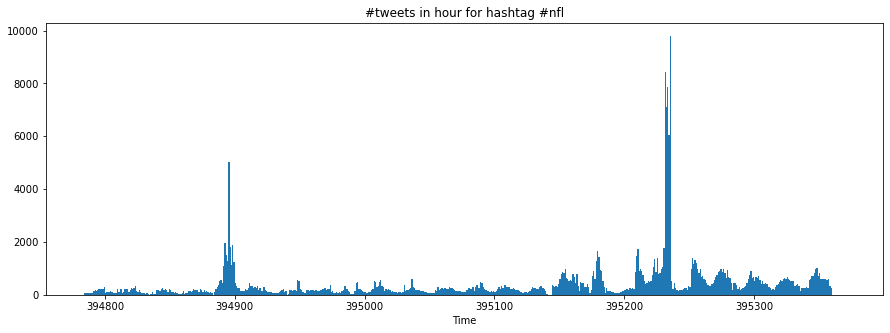

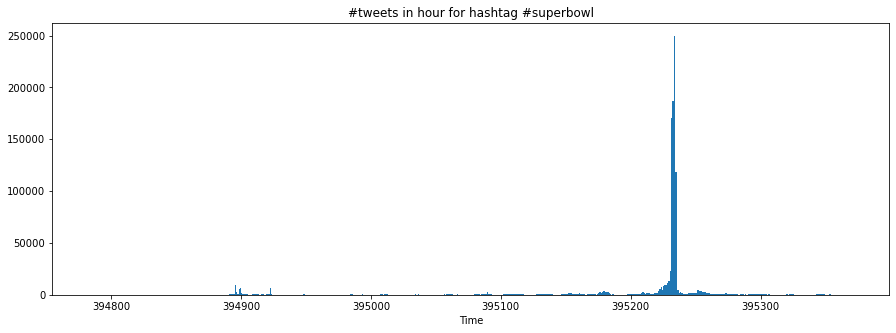

In [4]:
for filename in os.listdir(tweet_data):
    if ('superbowl' in filename)  or ('nfl' in filename):
        hashtag = filename.split('.')[0].split('_')[1]
        with open( os.path.join(tweet_data, filename), encoding="utf8") as fl:
            lines = fl.readlines()          

        t_max, t_min = -np.inf, np.inf
        t_list = []
        for h_line in lines:            
            hline_json = loads(h_line)
            t = hline_json['citation_date'] // 3600
            t_list.append(t)     
            if t > t_max: 
                t_max = t
            if t < t_min: 
                t_min = t      

        plt.figure(figsize=(15,5))
        bin_range = range(t_min, t_max+1)
        plt.hist(t_list, bins=bin_range)
        plt.title(f'#tweets in hour for hashtag {hashtag}')       
        plt.xlabel('Time')
        plt.show()                
